# Example 02: WOS

In [ ]:
############################################################################

# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# pyBibX - A Bibliometric and Scientometric Library
# Example - WOS

# Citation:
# PEREIRA, V.; BASILIO, M.P.; SANTOS, C.H.T. (2025). PyBibX: A Python Library for Bibliometric and
# Scientometric Analysis Powered with Artificial Intelligence Tools. Data Technologies and Applications.
# Vol. ahead-of-print No. ahead-of-print. doi: https://doi.org/10.1108/DTA-08-2023-0461

############################################################################

In [ ]:
# Restart the session afther this cell to avoid Google Colab errors
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas

In [ ]:
!pip install pybibx
!pip install tabulate

In [ ]:
# Dowload .bib file
!wget https://github.com/Valdecy/pyBibX/raw/main/assets/bibs/wos.bib

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

from google.colab import data_table
from tabulate import tabulate
from prettytable import PrettyTable
from pybibx.base import pbx_probe

# Load Dataset
---
In this section, we will load and inspect the dataset.

In [ ]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'wos.bib'
database  = 'wos'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 235 Documents were Found ( 236 Documents and 1 Duplicates )

Article = 173
Article in Press = 3
Proceedings Paper = 56
Review = 3


In [ ]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

Entries Completeness (%) Number of  Docs
0             Sources           80.00%             188
1           Abstracts          100.00%             235
2         Affiliation          100.00%             235
3           Author(s)          100.00%             235
4                 DOI           84.26%             198
5  Keywords - Authors           93.62%             220
6     Keywords - Plus           83.40%             196
7          References          100.00%             235
8                Year          100.00%             235

In [ ]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

Main Information    Results
0                                Timespan  1998-2022
1               Total Number of Countries         37
2            Total Number of Institutions        252
3                 Total Number of Sources         97
4              Total Number of References       6272
5               Total Number of Languages          4
6                   --english (# of docs)        230
7                    --french (# of docs)          2
8                --portuguese (# of docs)          2
9                   --turkish (# of docs)          1
10                                   -//-       -//-
11              Total Number of Documents        235
12                              --Article        173
13                     --Article in Press          3
14                    --Proceedings Paper         56
15                               --Review          3
16           Average Documents per Author       1.42
17      Average Documents per Institution       3.37
18           Average Documents per Source       1.94
19             Average Documents per Year       9.79
20                                   -//-       -//-
21                Total Number of Authors        517
22       Total Number of Authors Keywords        644
23  Total Number of Authors Keywords Plus        424
24        Total Single-Authored Documents          7
25         Total Multi-Authored Documents        228
26            Average Collaboration Index       3.13
27                            Max H-Index          8
28                                   -//-       -//-
29              Total Number of Citations       5842
30           Average Citations per Author       11.3
31      Average Citations per Institution      23.18
32         Average Citations per Document      24.86
33           Average Citations per Source      58.97
34                                   -//-       -//-

In [ ]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

+----+---------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 15)

In [ ]:
# Check Docs IDs per Type
data_table.DataTable(bibfile.id_doc_types(), num_rows_per_page = 15)

In [ ]:
# Check Authors IDs
data_table.DataTable(bibfile.table_id_aut, num_rows_per_page = 15)

In [ ]:
# These indices are local (considers only the .bib scope)
# H-index measures their academic impact by identifying the number of papers (h) that have each received at least h citations
# E-Index quatifies excess citations within the H-core revealing "hidden" impact beyond the H-index threshold.
# The G-Index emphasizes highly cited work, making it sensitive to breakthrough publications.
# The M-Index contextualizes the H-index by normalizing it over the researcher’s career duration
aut_m = bibfile.m_index(2022)
df_idx = {
    'Author': bibfile.u_aut,
    'H-index': bibfile.aut_h,
    'E-Index': bibfile.aut_e,
    'G-Index': bibfile.aut_g,
    'M-Index': aut_m
}

df_idx = pd.DataFrame(df_idx)
df_idx

Author  H-index    E-Index  G-Index   M-Index
0              abed, mourad        0   0.000000        0  0.000000
1           abi-zeid, irene        1   1.000000        1  0.500000
2           addi, ait-mlouk        0   0.000000        0  0.000000
3               adolphe, l.        1   1.000000        1  0.062500
4    aggarwal, puneet kumar        0   0.000000        0  0.000000
..                      ...      ...        ...      ...       ...
512      zielniewicz, piotr        1   3.316625        1  0.142857
513         ziomas, ioannis        1   4.898979        2  0.076923
514           zopounidis, c        3  22.022716        3  0.142857
515          zopounidis, c.        1   8.660254        1  0.071429
516  zopounidis, constantin        2   3.741657        2  0.181818

[517 rows x 5 columns]

In [ ]:
# Check Sources IDs
data_table.DataTable(bibfile.table_id_jou, num_rows_per_page = 15)

In [ ]:
# Check Institutions IDs
data_table.DataTable(bibfile.table_id_uni, num_rows_per_page = 15)

In [ ]:
# Check Countries IDs
data_table.DataTable(bibfile.table_id_ctr, num_rows_per_page = 15)

In [ ]:
# Check Authors Keywords IDs
data_table.DataTable(bibfile.table_id_kwa, num_rows_per_page = 15)

In [ ]:
# Check Keywords Plus IDs
data_table.DataTable(bibfile.table_id_kwp, num_rows_per_page = 15)

In [ ]:
# Check Reference IDs (If References are Given)
df = pd.DataFrame({'Reference': bibfile.u_ref, 'Reference ID': bibfile.u_ref_id})
data_table.DataTable(df, num_rows_per_page = 15)

# Exploratory Data Analysis
---
In this section, we will perform EDA

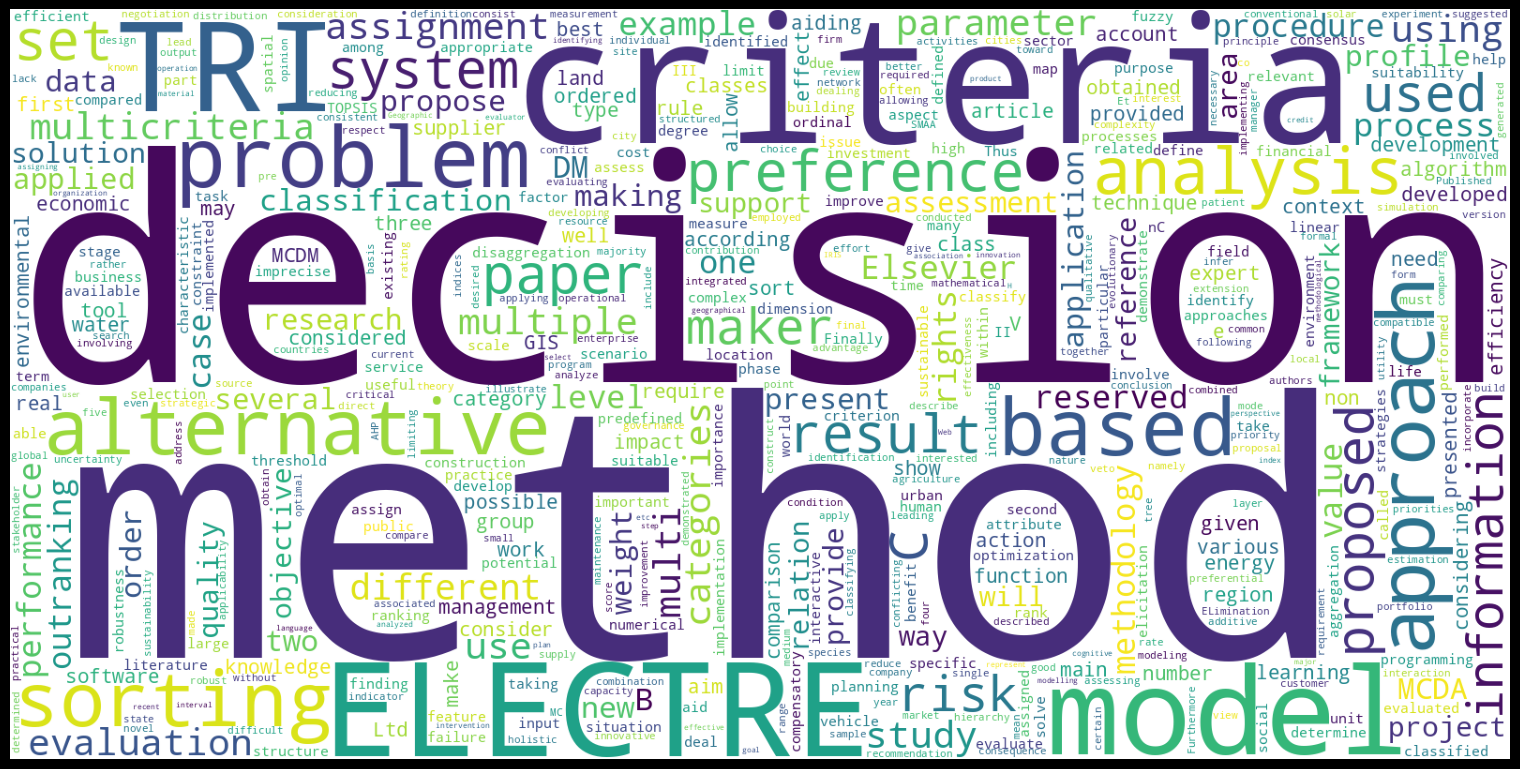

In [ ]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry             = 'abs', 'title', 'kwa', or 'kwp'
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500, rmv_custom_words = [])

In [ ]:
# Check Table
num_columns = 5
data_wd     = bibfile.ask_gpt_wd
items       = list(data_wd.items())

field_names = []
for i in range(num_columns):
    field_names.append(f"Word {i + 1}")
    field_names.append(f"Importance {i + 1}")

table = PrettyTable()
table.field_names = field_names

for i in range(0, len(items), num_columns):
    row = []
    for j in range(num_columns):
        if i + j < len(items):
            word, importance = items[i + j]
            row.extend([word, round(importance, 4)])
        else:
            row.extend(["", ""])
    table.add_row(row)

# Print the table
print(table)

+---------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
|     Word 1    | Importance 1 |     Word 2     | Importance 2 |     Word 3     | Importance 3 |     Word 4     | Importance 4 |     Word 5     | Importance 5 |
+---------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
|     method    |     1.0      |    decision    |    0.8915    |    criteria    |    0.6872    |    ELECTRE     |    0.6596    |      TRI       |    0.5979    |
|     model     |    0.5617    |    problem     |    0.4277    |    approach    |    0.366     |     based      |    0.3638    |  alternative   |    0.3447    |
|    sorting    |    0.3404    |    analysis    |    0.3319    |   preference   |    0.3149    |      set       |    0.3085    |     paper      |    0.2979    |
|     result    |    0.2915    |  

In [ ]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                        'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                        'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                        'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [ ]:
# Check Table
data_ng = bibfile.ask_gpt_ng
data_table.DataTable(data_ng, num_rows_per_page = 15)

In [ ]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Only relevant if  cluster_method = 'kmeans'.Number of Clusters.;
#            node_labels       = If True, labels appear in nodes;
#            node_size         = Node size;
#            node_font_size    = Node font size;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label);
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label);
#            model             = Only relevant if 'embeddings = True'. Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased';
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used);
#            showlegend        = If True, shows legend;
#            cluster_method    = 'kmeans' or 'hdbscan';
#            min_size          = Only relevant if  cluster_method = 'hdbscan'. Minimum number of elements in a Cluster;
#            max_size          = Only relevant if  cluster_method = 'hdbscan'. Maximum number of elements in a Cluster
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             node_labels       = True,
                                             node_size         = 12,
                                             node_font_size    = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             model             = 'allenai/scibert_scivocab_uncased',
                                             method            = 'umap',
                                             showlegend        = True,
                                             cluster_method    = 'kmeans',
                                             min_size          = 5,
                                             max_size          = 50
                                             )

In [ ]:
# Check Table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_table.DataTable(data_pr, num_rows_per_page = 15)

In [ ]:
# Check Articles per Cluster
cluster      = 0
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

0, 2, 9, 10, 15, 23, 29, 35, 45, 53, 54, 56, 67, 79, 81, 84, 92, 93, 96, 100, 102, 107, 111, 124, 126, 133, 140, 156, 158, 164, 174, 178, 192, 194, 199, 201, 205, 208, 209, 214, 224, 225, 233


In [ ]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = [],
                            rmv_custom_words = [],
                            key              = 'kwa',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2010,
                            end              = 2021)

In [ ]:
# View Table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2010: electre tri (4), adaptive algorithms (2), handling preferences (2), sorting (2), natural gas pipelines (1), negotiations (1), constructive
approach (1), trustworthy software (1), stock exchange (1), robust analysis (1) 2011: sorting (2), multicriteria decision aiding (2), preference
elicitation (2), multilateral environmental agreements (1), reservoir operation (1), preference aggregation and disaggregation (1), portfolio
selection (1), nsga-ii (1), learning methods (1), risk of multiple pregnancies (1) 2012: decision support (3), electre tri (2), multiple criteria
sorting (2), drsa (1), surface deformations (1), sorting methods (1), rough sets theory (1), risk breakdown structure (1), risk analysis (1),
rehabilitation plan (1) 2013: electre tri (2), multiple criteria sorting (2), multicriteria decision aid (2), information management (1),
disaggregation (1), additive value function (1), theseus method (1), regularized spline with tension (1), preference-disaggregation analysis 

In [ ]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn              = Most frequent n words
#            custom            = Plot specific words
bibfile.plot_evolution_year_complement(data_ep, view = 'notebook', topn = 10, custom = [])

In [ ]:
# Sankey Diagram (An interactive plot)
# Arguments:
#   view         : Determines the rendering mode.'notebook' -> Plots in your preferred Notebook app. 'browser'  -> Plots in your preferred browser window.
#   entry        : A list defining the sequence of data columns to be visualized. Allowed keys: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'
#   rmv_unknowns : Boolean flag controlling how unknown entries are handled. True  -> Remove any relationships that include 'unknown'.
#   topn         : Specifies the maximum number of top entities/connections to display at each level. Set to "None" for no filtering or provide a list with limits corresponding to each connection between the nodes defined in 'entry'.
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'lan'], topn = [3, 5], rmv_unknowns = True)

# PS: The white bars can be dragged

In [ ]:
# View Table
data_sk = bibfile.ask_gpt_sk
data_table.DataTable(data_sk, num_rows_per_page = 15)

In [ ]:
# Plot Count Y per X (An interactive bar chart)
# Arguments:
#   view          : Determines where the plot will be rendered. 'browser'  -> Plots in your preferred browser window. 'notebook' -> (if supported) Plots within your notebook environment.
#   rmv_unknowns  : Boolean flag to handle unknown entries. True  -> Removes any relationships containing unknown values.
#   x             : The key (column) to use for the X-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'cout'.
#   y             : The key (column) to use for the Y-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'aut'.
#   topn_x        : Maximum number of top X categories (based on total counts) to display. Default is 5.
#   topn_y        : Maximum number of top Y entries (per X category) to display. Default is 5.
#   text_font_size: Font size for the text labels displayed inside the bars. Default is 12.
#   x_angle       : Angle (in degrees) for the X-axis tick labels. Default is -90 (rotating labels vertically).
bibfile.plot_count_y_per_x(view = 'notebook', rmv_unknowns = True, x = 'cout', y = 'aut', topn_x = 5, topn_y = 5, text_font_size = 12, x_angle = -90)

In [ ]:
# View Table
data_table.DataTable(bibfile.top_y_x, num_rows_per_page = 15)

In [ ]:
# Tree Map
# Arguments: view          = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(view = 'notebook', entry = 'jou', topn = 20)

In [ ]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_table.DataTable(data_ap, num_rows_per_page = 15)

In [ ]:
# Countries Productivity Plot (An interactive plot). It informs the production for each Country (count is made considering each doc author)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
bibfile.countries_productivity(view = 'notebook')

In [ ]:
# View Table
data_cp = bibfile.ask_gpt_cp
data_table.DataTable(data_cp, num_rows_per_page = 15)

In [ ]:
# Institutions Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each institution
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.institution_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_ip = bibfile.ask_gpt_ip
data_table.DataTable(data_ip, num_rows_per_page = 15)

In [ ]:
# Sources Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each source (journal)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.source_productivity(view = 'notebook', topn = 20)

In [ ]:
# View Table
data_sp = bibfile.ask_gpt_sp
data_table.DataTable(data_sp, num_rows_per_page = 15)

In [ ]:
# Bar Plots
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#                    statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#                         topn = Total number entities
bibfile.plot_bars(view = 'notebook', statistic = 'apd', topn = 20)

In [ ]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_table.DataTable(data_bp, num_rows_per_page = 15)

In [ ]:
# Plot Top References
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn       = Specifies the number of top references (by citation count) to display in the plot;
#            font_size  = Controls the font size of the legend in the plot;
#            use_ref_id = Chooses between using reference names or reference IDs when processing and plotting data;
#            date_start = If provided, shows citing articles with a publication year greater than or equal to this value are included. If None, then there is no lower limit on the publication year.
#            date_end   = If provided, shows citing articles with a publication year less than or equal to this value are included. If None, then there is no upprer limit on the publication year.
bibfile.plot_top_refs(view = 'notebook', topn = 10, font_size = 10, use_ref_id = False, date_start = None, date_end = None)

In [ ]:
# Check Top References
data_table.DataTable(bibfile.top_refs, num_rows_per_page = 15)

# PS: Optionally, use 'bibfile.merge_reference(get = [], replace_for = 'name' )' to correct References
# wrong_references = [
#                     'Mousseau, V., Slowinski, R., Inferring an ELECTRE TRI model from assignment examples (1998) Journal of Global Optimization, 12, pp. 157-174',
#                     'Mousseau, V., Słowiński, R., Inferring an ELECTRE TRI model from assignment examples (1998) Journal of Global Optimization, 12 (2), pp. 157-174'
#                    ]
# correct_reference = 'Mousseau, V., Slowinski, R., Inferring an ELECTRE TRI model from assignment examples (1998) Journal of Global Optimization, 12 (2), pp. 157-174'
# bibfile.merge_reference(get = wrong_references, replace_for = correct_reference)

In [ ]:
# Citation Trajectory
# Arguments: view     = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#           ref_names = If provided (i.e., nonempty), the function uses these reference names to track and plot citation trajectories;
#           ref_ids   = If ref_names is empty but ref_ids is provided, the function will use these IDs instead.
bibfile.plot_citation_trajectory(view = 'notebook', ref_names = [], ref_ids = ['234', 'r_1937', '164'])

In [ ]:
# References Citation Matrix
# Arguments: tgt_ref_id = For a nonempty list, show olny the references in the list. An empty list (the default), shows all references;
#            date_start = If provided, shows citing articles with a publication year greater than or equal to this value are included. If None, then there is no lower limit on the publication year;
#            date_end   = If provided, shows citing articles with a publication year less than or equal to this value are included. If None, then there is no upprer limit on the publication year.
ct_matrix = bibfile.ref_citation_matrix(tgt_ref_id = ['234', 'r_1937', '164'], date_start = None, date_end = None)

# Check Citation Matrix. Citing Articles are in the format (Article ID, Year)
ct_matrix

Reference Reference ID  \
0  Almeida-Dias J, 2012, EUR J OPER RES, V217, P5...          164   
1  Figueira J, 2002, EUR J OPER RES, V139, P317, ...       r_1937   
2  Mousseau V, 1998, J GLOBAL OPTIM, V12, P157, D...          234   

   Reference Year                                    Citing Articles  
0            2012  [(99, 2016), (44, 2019), (112, 2016), (117, 20...  
1            2002  [(131, 2014), (211, 2007), (32, 2020), (44, 20...  
2            1998  [(154, 2013), (80, 2017), (204, 2007), (225, 2...

In [ ]:
# RPYS (Reference Publication Year Spectroscopy) with Gaussian Filter to Find Peaks
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            peaks_only = If False, the function plots data for all publication years. If True, shows only peaks.
bibfile.plot_rpys(view = 'notebook', peaks_only = False)

# PS: Use the Slider to focus in a range of years

In [ ]:
# Check RPYS Data
data_table.DataTable(bibfile.rpys_rs, num_rows_per_page = 15)

In [ ]:
# Check RPYS Data Peaks
data_table.DataTable(bibfile.rpys_pk, num_rows_per_page = 15)

# Network Analysis
---
In this section, we will perform Network Analysis

In [ ]:
# References Top Cited Co-References
# Arguments: groups = controls how many references are considered together;
#            topn   = Specifies the number of top references (by citation count) to display in the plot;
co_cited = bibfile.top_cited_co_references(group = 2, topn = 10)
co_cited

Reference ID Sets  Count
0     (234, r_1537)     51
1     (234, r_3941)     48
2     (234, r_3943)     42
3  (r_3941, r_3943)     40
4  (r_1537, r_3941)     36
5  (r_1537, r_3943)     31
6        (164, 178)     29
7     (234, r_4752)     29
8     (234, r_4761)     29
9  (r_3941, r_4540)     28

In [ ]:
# Plot Co-Citation Network
# Arguments:  view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#             tgt_ref_id = The reference ID;
#             topn       = Specifies the number of top references (by citation count) to display in the plot;
bibfile.plot_co_citation_network(view = 'notebook', target_ref_id = 'r_1937', topn = 10)

In [ ]:
# Check Co-Citation Network
data_table.DataTable(bibfile.top_co_c, num_rows_per_page = 15)

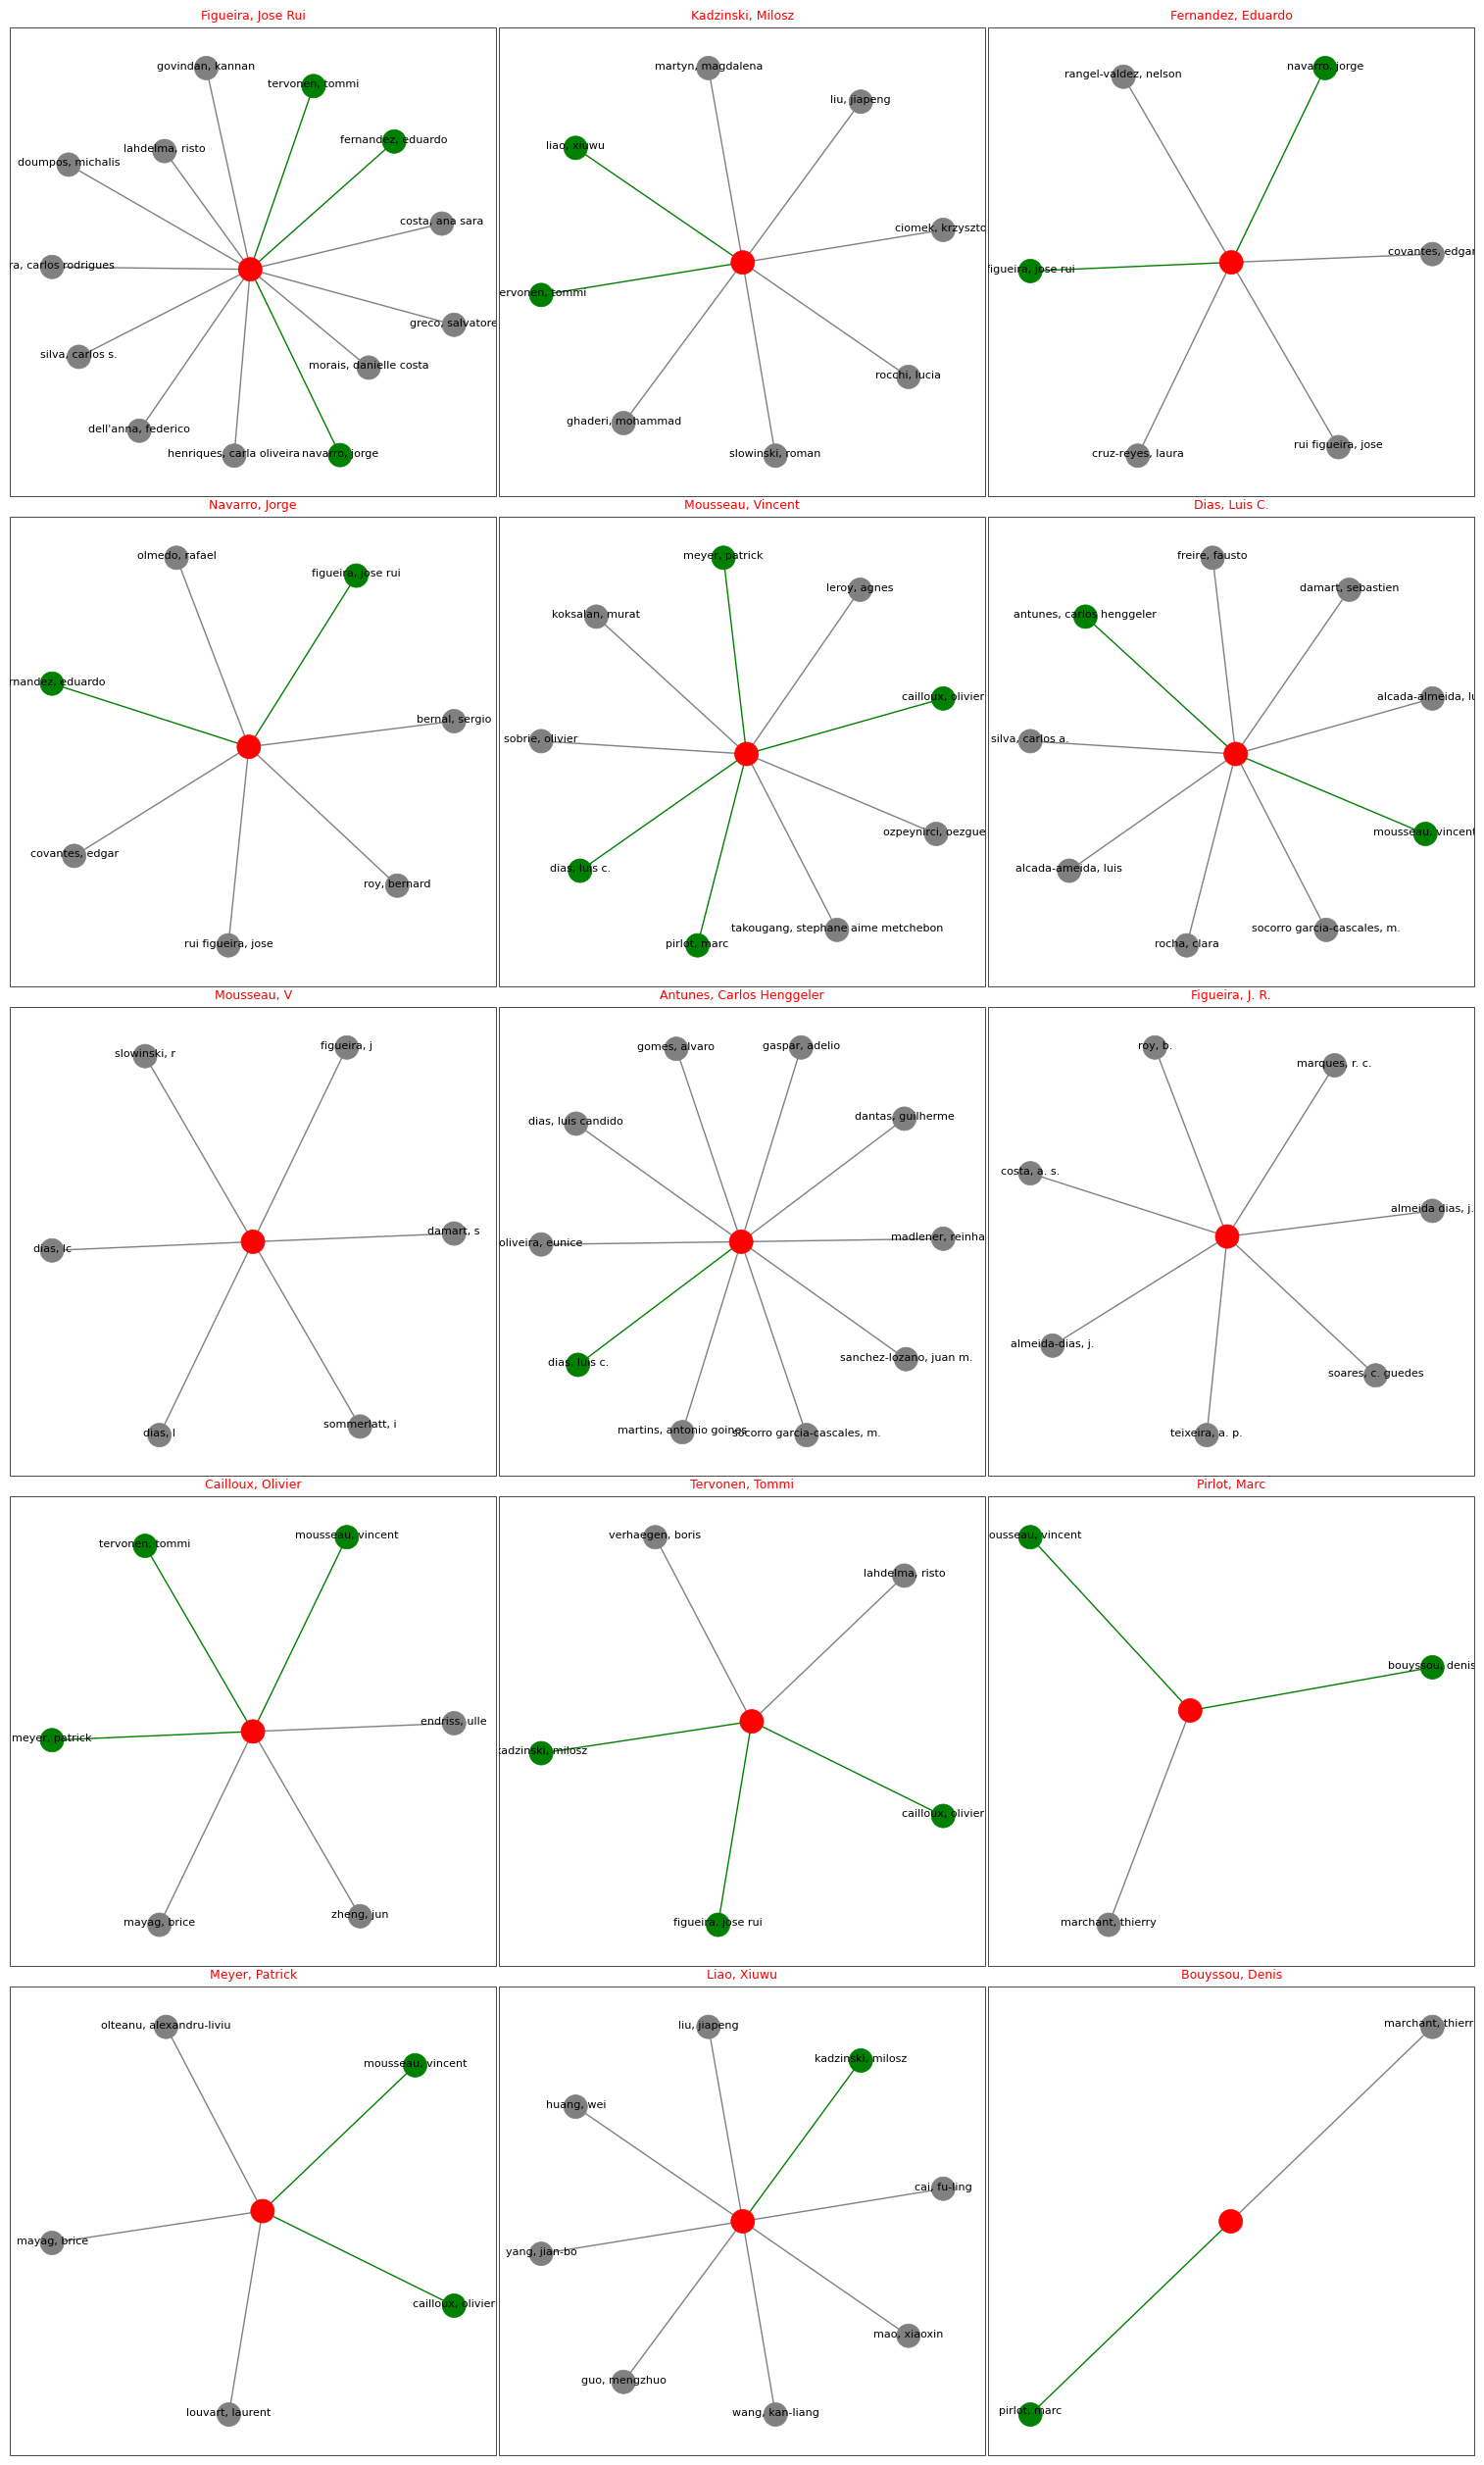

In [ ]:
# Arguments:
# entry      = 'aut', 'cout', 'inst', 'kwa', or 'kwp'.
# tgt        = List of specific names.
# topn       = Integer. Specifies the number of top authors to display based on their total contributions.
# rows       = Integer. Defines the number of rows in the subplot grid for the visual layout.
# cols       = Integer. Defines the number of columns in the subplot grid for the visual layout.
# wspace     = Float. Adjusts horizontal spacing between subplots.
# hspace     = Float. Adjusts vertical spacing between subplots.
# tspace     = Float. Sets additional vertical space between nodes and labels for better readability.
# node_size  = Integer. Controls the size of each node in the network graph.
# font_size  = Integer. Defines the font size for node labels.
# pad        = Float. Adjusts padding around the layout for a balanced appearance.
# nd_a       = Color string (e.g., '#FF0000'). Specifies the color for the primary node (main author).
# nd_b       = Color string (e.g., '#008000'). Specifies the color for secondary nodes (authors with significant links).
# nd_c       = Color string (e.g., '#808080'). Specifies the color for other nodes (authors with minor links).
# verbose    = Boolean. If True, prints details of each main node and its connections in the console; if False, suppresses this output.
bibfile.network_collab( entry     = 'aut',
                        tgt       = [],
                        topn      = 15,
                        rows      = 5,
                        cols      = 3,
                        wspace    = 0.2,
                        hspace    = 0.2,
                        tspace    = 0.01,
                        node_size = 300,
                        font_size = 8,
                        pad       = 0.2,
                        nd_a      = '#FF0000',
                        nd_b      = '#008000',
                        nd_c      = '#808080',
                        verbose   = False)

In [ ]:
print(bibfile.ask_gpt_ct)

[[['figueira, jose rui'], ['costa, ana sara', "dell'anna, federico", 'doumpos, michalis', 'fernandez, eduardo', 'govindan, kannan', 'greco, salvatore', 'henriques, carla oliveira', 'lahdelma, risto', 'morais, danielle costa', 'navarro, jorge', 'silva, carlos s.', 'tervonen, tommi', 'vieira, carlos rodrigues']], [['kadzinski, milosz'], ['ciomek, krzysztof', 'ghaderi, mohammad', 'liao, xiuwu', 'liu, jiapeng', 'martyn, magdalena', 'rocchi, lucia', 'slowinski, roman', 'tervonen, tommi']], [['fernandez, eduardo'], ['covantes, edgar', 'cruz-reyes, laura', 'figueira, jose rui', 'navarro, jorge', 'rangel-valdez, nelson', 'rui figueira, jose']], [['navarro, jorge'], ['bernal, sergio', 'covantes, edgar', 'fernandez, eduardo', 'figueira, jose rui', 'olmedo, rafael', 'roy, bernard', 'rui figueira, jose']], [['mousseau, vincent'], ['cailloux, olivier', 'dias, luis c.', 'koksalan, murat', 'leroy, agnes', 'meyer, patrick', 'ozpeynirci, oezguer', 'pirlot, marc', 'sobrie, olivier', 'takougang, stephane

In [ ]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = Integer. Value for node size;
#            font_size   = Integer. Defines the font size for node labels;
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 40, node_labels = True, node_size = 20, font_size = 10, local_nodes = False)

In [ ]:
# View Table
data_nad = bibfile.ask_gpt_nad
data_table.DataTable(data_nad, num_rows_per_page = 15)

In [ ]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them;
#            font_size   = Integer. Defines the font size for node labels;
#            node_size   = Integer. Value for node size
bibfile.find_nodes_dir(view = 'notebook', article_ids = ['100'], ref_ids = [], node_size = 20, font_size = 10)

In [ ]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them;
#            font_size   = Integer. Defines the font size for node labels;
#            node_size   = Integer. Value for node size
bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = ['r_1937'], node_size = 20, font_size = 10)

In [ ]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_links   = Relationship between nodes that have connected at least x times;
#            node_size   = Integer. Value for node size;
#            font_size   = Integer. Defines the font size for node labels;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            chain       = A list of documents. It shows the documents and their citations;
#            path       =  Only relevant if 'chain' is not empty. True -> Show only the documents in 'chain'. False -> Show documents and connections.
citations = bibfile.network_hist(view = 'notebook', min_links = 0, chain = [], path = False, node_size = 20, font_size = 10, node_labels = True)

In [ ]:
# View Table
data_hist = bibfile.ask_gpt_hist
data_table.DataTable(data_hist, num_rows_per_page = 15)

In [ ]:
citations = bibfile.network_hist(view = 'notebook', min_links = 0, chain = [2, 170], path = False, node_size = 20, font_size = 10, node_labels = True)

In [ ]:
citations = bibfile.network_hist(view = 'notebook', min_links = 0, chain = [4, 42, 68, 100, 124, 133, 188], path = True, node_size = 20, font_size = 10, node_labels = True)

In [ ]:
# Network - Analyze Hist. Citations
# Arguments: min_path_size = Minimum number of elements of a path.
hist_paths = bibfile.analyze_hist_citations(citations, min_path_size = 2)

Most Referenced Paper ID: 234 -> Cited 95 Times
Paper ID that Cites the Most: 2 -> Cites 49 Papers
Paper IDs of Longest Citation Path: [4, 42, 68, 100, 124, 133, 188]


In [ ]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [ ]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_table.DataTable(data_adj, num_rows_per_page = 15)

In [ ]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['fernandez, eduardo'], node_only = False)

In [ ]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 10)

In [ ]:
# Check Similarity Values
data_table.DataTable(bibfile.sim_table, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [ ]:
# View Table
data_map = bibfile.ask_gpt_map
data_table.DataTable(data_map, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Mexico'])

# Artificial Intelligence Analysis
---
In this section, we will perform AI Analysis

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            model             = Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased'
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs', model = 'allenai/scibert_scivocab_uncased')
emb = bibfile.embds

In [ ]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
#            model             = Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased'
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False, model = 'allenai/scibert_scivocab_uncased')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                                  Name  \
0     -1     41        -1_decision_electre_tri_method   
1      0    115     0_method_decision_electre_sorting   
2      1     39        1_decision_criteria_gis_system   
3      2     20  2_risk_suppliers_decision_management   
4      3     20     3_energy_criteria_vehicles_public   

                                      Representation  \
0  [decision, electre, tri, method, criteria, ana...   
1  [method, decision, electre, sorting, tri, crit...   
2  [decision, criteria, gis, system, electre, wat...   
3  [risk, suppliers, decision, management, approa...   
4  [energy, criteria, vehicles, public, decision,...   

                                 Representative_Docs  
0  [evaluating comparing threats vulnerabilities ...  
1  [finite alternatives sorting assignment proble...  
2  [weighted sum incorporated geographical inform...  
3  [failure mode effects analysis fmea engineerin...  
4  [article presents methodology classify lig

In [ ]:
# Authors Production per Topic
production_topics = bibfile.topics_authors(topn = 15)
production_topics

-1   0  1  2  3  Total
mousseau, v                 1  15  0  0  1     17
figueira, jose rui          1   6  0  1  3     11
kadzinski, milosz           0   9  0  0  1     10
fernandez, eduardo          0  10  0  0  0     10
navarro, jorge              0   9  0  0  0      9
dias, luis c.               0   2  4  0  3      9
mousseau, vincent           1   7  0  0  0      8
antunes, carlos henggeler   0   3  1  0  3      7
figueira, j. r.             0   4  2  0  0      6
cailloux, olivier           2   4  0  0  0      6
tervonen, tommi             0   5  0  0  0      5
pirlot, marc                0   5  0  0  0      5
meyer, patrick              1   3  1  0  0      5
liao, xiuwu                 0   5  0  0  0      5
bouyssou, denis             0   5  0  0  0      5

In [ ]:
# NLP
# Each document Topic
topics = bibfile.topics

In [ ]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_time(view = 'notebook')

In [ ]:
# NLP
bibfile.topics_representatives()

Topic          Docs
0   -1.0              
1    0.0  227; 15; 234
2    1.0  139; 24; 163
3    2.0   85; 64; 104
4    3.0   116; 65; 27

In [ ]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  3 Correlation:  0.158
Topic:  0 Correlation:  0.132
Topic:  -1 Correlation:  0.122
Topic:  1 Correlation:  0.091
Topic:  2 Correlation:  0.066


In [ ]:
# NLP
# Arguments: doc_id = Article ID. For the specified article, this function evaluates how each word in its abstract semantically aligns with all topics in the model.
df = bibfile.topics_words(doc_id = 42)
df

Topic 0   Topic 1  \
Smart                                                   0.0  0.000000   
PSS                                                     0.0  0.000000   
product                                                 0.0  0.000000   
service                                                 0.0  0.128746   
system                                                  0.0  0.128746   
...                                                     ...       ...   
verified                                       ...      0.0  0.000000   
by                                             ...      0.0  0.000000   
analysing                                      ...      0.0  0.000000   
comparative                                    ...      0.0  0.000000   
results                                        ...      0.0  0.000000   

                                                     Topic 2  Topic 3  
Smart                                               0.107627      0.0  
PSS                                                 0.217857      0.0  
product                                             0.217857      0.0  
service                                             0.327398      0.0  
system                                              0.219771      0.0  
...                                                      ...      ...  
verified                                       ...  0.000000      0.0  
by                                             ...  0.000000      0.0  
analysing                                      ...  0.000000      0.0  
comparative                                    ...  0.000000      0.0  
results                                        ...  0.000000      0.0  

[233 rows x 4 columns]

In [ ]:
# NLP
bibfile.topic_model.save('my_topic_model')
#loaded_topic_model = BERTopic.load('my_topic_model')

In [ ]:
# W2V
model, corpus, w_emb, vocab = bibfile.word_embeddings(stop_words        = ['en'],
                                                      lowercase         = True,
                                                      rmv_accents       = True,
                                                      rmv_special_chars = False,
                                                      rmv_numbers       = True,
                                                      rmv_custom_words  = [],
                                                      vector_size       = 100,
                                                      window            = 5,
                                                      min_count         = 1,
                                                      epochs            = 10)

In [ ]:
# W2V - Similarity
similarity = bibfile.word_embeddings_sim(model, word_1 = 'mcda', word_2 = 'risk')
similarity

0.9941683

In [ ]:
# W2V - Find Docs
results = bibfile.word_embeddings_find_doc(corpus, target_words = ['mcda', 'risk'])
results

[(168,
  'The aim of this paper is to compare sorting and ranking methods for   prioritization of rehabilitation interventions of sewers, taking into   account risk, performance and cost. For that purpose multiple criteria   decision-aid (MCDA) methods such as ELECTRE TRI for sorting and ELECTRE   III for ranking are applied in a real case-study and the results   obtained are compared. The case study is a small sanitary sewer system   from a Portuguese utility located in the metropolitan area of Lisbon.   The problem to investigate is the prioritization of the sewer candidates   for rehabilitation. The decision maker (a panel group of specialists)   has chosen five assessment measures: water level and maximum flow   velocity (hydraulic performance indices), sewer importance and failure   repair cost (collapse-related consequences of failure) and the risk of   collapse. The results show that the outcomes from ELECTRE III are easier   to understand than those from ELECTRE TRI method. Two

In [ ]:
# W2V - Operations
operations = bibfile.word_embeddings_operations(model, positive = ['mcda', 'group'], negative = ['risk'], topn = 10)
operations

[('mutation', 0.999657154083252),
 ('situation', 0.9996525645256042),
 ('navigation', 0.9996289014816284),
 ('location', 0.9996116161346436),
 ('education', 0.99958735704422),
 ('aggregation', 0.9995754957199097),
 ('cation', 0.999573290348053),
 ('emulation', 0.9995688796043396),
 ('evaluation', 0.999556303024292),
 ('hybridization', 0.9995096325874329)]

In [ ]:
# W2V - Operations Plot.
bibfile.plot_word_embeddings(model,
                             view      = 'notebook',
                             positive  = [ ['mcda', 'group'], ['decision'],             ['group']],
                             negative  = [ ['risk'],          ['research', 'analysis'], []       ],
                             topn      = 5,
                             node_size = 10,
                             font_size = 14)

In [ ]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [233, 164, 180], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

<pad>A sorting method which takes into account several reference actions for each category has been proposed and tested in a number of papers.</s>


In [ ]:
# NLP - Abstractive Summarization - chatGPT

# OBS 1: Requires the user to have an **API key** (https://platform.openai.com/account/api-keys))
# OBS 2: The limit of characters is 4097 per request

# Arguments: article_ids   = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            join_articles = If False then the abstracts will be analyzed separately. If True then the abstracts will be concate in a single text
#            api_key       = 'your_api_key_here'. Insert your personal API key (https://platform.openai.com/account/api-keys)
#            model         = Specifies the AI model used for text generation. The default value is "text-davinci-003"
#            query         = Ask chatGPT what you want to do with the abstracts. The default query is: 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words'
abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [233, 164, 180], join_articles = True, api_key = 'your_api_key_here', query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

Document ID164 Number of Characters: 1155
Document ID180 Number of Characters: 951
Document ID233 Number of Characters: 81

Total Number of Valid Abstracts:  3.0



In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary_chat, 250))

The first abstract discusses a new sorting method, ELECTRE TRI-NC, which takes into account several reference actions for characterizing each category. This new method gives the decision maker more freedom to characterize the set of categories. The
second abstract discusses case-based preference elicitation methods for multiple criteria sorting problems and how they may lead to ambiguous results. The third abstract discusses the multiple criteria sorting problem and how it consists in assigning
a set of alternatives.


In [ ]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [233, 164, 180])


Total Number of Valid Abstracts:  3



Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

This paper presents ELECTRE TRI-NC, a new sorting method which takes   into account several reference actions for characterizing each category. As in
such a sorting method, this new   sorting method is composed of two joint rules. C) 2011 Elsevier B.V. All rights reserved. Our experiments   compare
two decision analysis tools, case-based distance sorting and the   simple additive weighting method, in terms of the effects of additional   case
information on sorting performance, depending on problem dimension   - number of groups, number of criteria, etc.


# Correction and Data Manipulation
---
In this section, we will show how to Correct & Manipulate your Data

In [ ]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

In [ ]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')
bibfile.merge_reference(get = [], replace_for = 'name')

In [ ]:
# Work with modified .bib File

# 1) Input a .bib to instantiate a class => bibfile  = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)
# 2) Then made the modifications and save the data externally => bibfile.save_database(sep = '\t', name = 'data.csv')
# 3) To load the modified .bib file ( 'data.csv') => bibfile.load_database(name = 'data.csv')

# PS: Even with the saved 'data.csv', you always need to do step 1, so to be fast, have any small .bib file in hand.
# Then, you can go directly to step 3, and your saved .bib ('data.csv') will replace the small .bib